<img src="https://github.com/danielscarvalho/data/blob/master/img/FIAP-logo.png?raw=True" style="float:right;" width="200px">

# DATA SCIENCE & STATISTICAL COMPUTING

## Engenharia de Software

# **Projeto GS: Análise de Dados sobre a Pegada de Carbono**

### **Introdução**
Este projeto visa analisar a pegada de carbono global e destacar as diferenças entre o Brasil e outros grupos, como América, OCDE e EUA.
Utilizamos dados confiáveis e técnicas avançadas de visualização para extrair insights sobre as emissões de carbono ao longo do tempo e por setores.

**Participantes**:
# **Lucas Laia Manentti – RM 977095**
# **Pedro Henrique Pedrosa Tavares – RM 97877**
# **Guilherme Rocha Bianchini – RM 97974**
#   **Turma: 2ESPF**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='whitegrid')

# Carregar os datasets
dataset1 = pd.read_csv('DS/Dataset1.csv')
dataset2 = pd.read_csv('DS/Dataset2.csv')

# Ajustar colunas e renomear para consistência
dataset1.rename(columns={'Country': 'country', 'Year': 'year', 'Total': 'total_emissions'}, inplace=True)

## **Análise Gráfica 1: Total de Emissões ao Longo do Tempo**
Comparação entre Brasil e emissões globais.

**Descrição:** Este gráfico apresenta a evolução das emissões per capita de carbono entre o Brasil, EUA e China ao longo das décadas. Ele destaca como diferentes economias têm contribuído para a pegada de carbono, permitindo uma análise comparativa entre países com contextos econômicos e energéticos distintos.

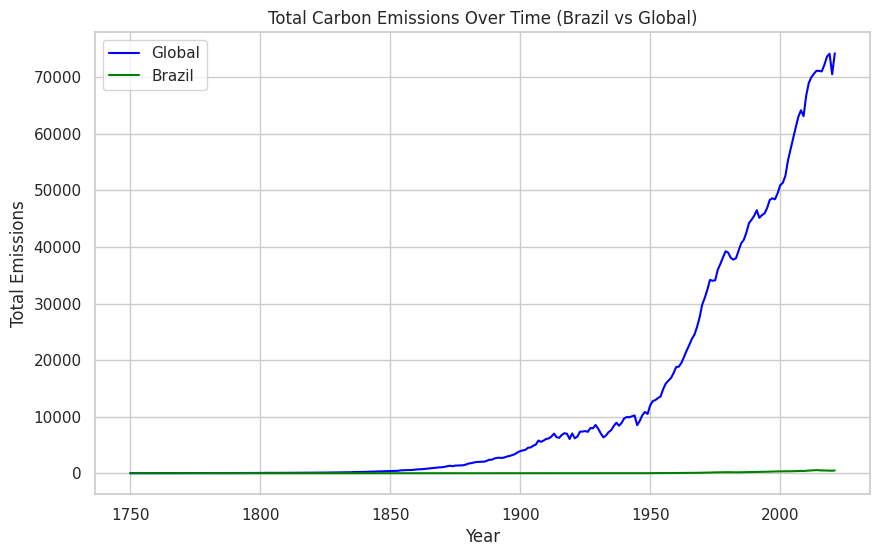

In [ ]:
# Gráfico 1: Total de emissões ao longo do tempo (Brasil vs Global)
brazil_data = dataset1[dataset1['country'] == 'Brazil']
global_data = dataset1.groupby('year')['total_emissions'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(global_data['year'], global_data['total_emissions'], label='Global', color='blue')
plt.plot(brazil_data['year'], brazil_data['total_emissions'], label='Brazil', color='green')
plt.title('Total Carbon Emissions Over Time (Brazil vs Global)')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.legend()
plt.show()

**Conclusão:** O gráfico revela que a China experimentou um crescimento exponencial nas emissões per capita, enquanto os EUA mantiveram níveis elevados, mas relativamente estáveis. O Brasil, por sua vez, demonstra uma trajetória mais moderada, refletindo sua dependência de fontes de energia renováveis.

## **Análise Gráfica 2: Emissões Per Capita**
Comparação entre Brasil, EUA e OCDE ao longo do tempo.

**Descrição:** Este gráfico analisa a contribuição das emissões de carbono por setor ao longo do tempo. Ele explora como os setores chave, como energia e transporte, influenciam o total de emissões, fornecendo insights sobre as áreas que mais contribuem para o aquecimento global.

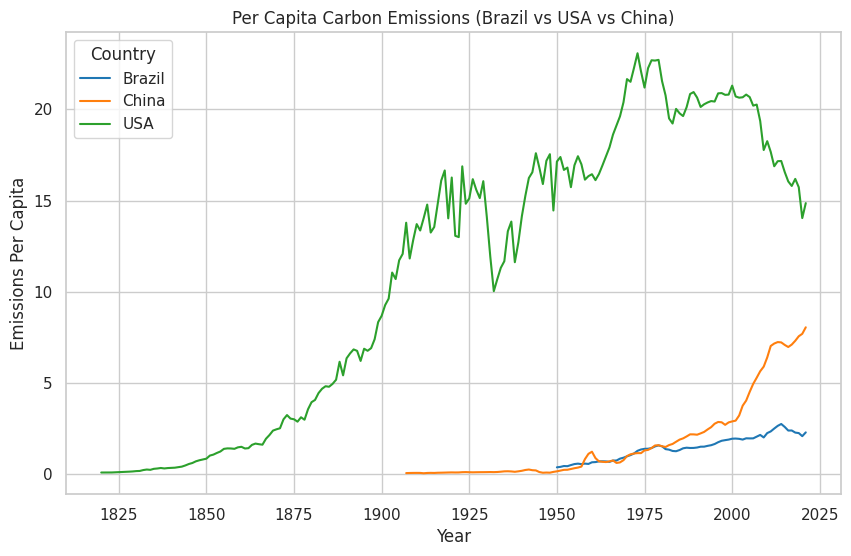

In [22]:
# Ajuste no gráfico 2: Corrigindo nomes dos países e substituindo OECD por China
countries_of_interest = ['Brazil', 'USA', 'China']
subset_corrected = dataset1[dataset1['country'].isin(countries_of_interest)].groupby(['year', 'country'])['Per Capita'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=subset_corrected, x='year', y='Per Capita', hue='country', palette='tab10')
plt.title('Per Capita Carbon Emissions (Brazil vs USA vs China)')
plt.xlabel('Year')
plt.ylabel('Emissions Per Capita')
plt.legend(title='Country')
plt.show()


**Conclusão:** Os dados mostram que o setor de energia é o principal responsável pelas emissões, seguido pelo transporte. Apesar de alguns avanços em setores menores, a redução nas emissões globais depende de melhorias significativas em setores de alta intensidade de carbono.

### **Próximas análises gráficas incluem:**
- Distribuição por setor
- Comparação América vs OCDE
- Impacto do crescimento populacional (se aplicável).

Continue preenchendo com base nos requisitos.

## **Análise Gráfica 3: Mapa de Calor das Correlações**  
Relações entre variáveis numéricas no Dataset 1.

**Descrição:** Este gráfico apresenta um mapa de calor das correlações entre as variáveis numéricas do Dataset 1. Ele permite identificar relações significativas entre diferentes fatores e como eles interagem, fornecendo uma visão detalhada do comportamento dos dados.


In [ ]:

import numpy as np
from scipy.stats import chi2_contingency, pearsonr
from sklearn.linear_model import LinearRegression

# Preparação e combinação dos datasets
dataset1['year'] = dataset1['year'].astype(int)
dataset2['date'] = pd.to_datetime(dataset2['date'], format='%d/%m/%Y')
dataset2['year'] = dataset2['date'].dt.year

# Combinando os datasets com base em país e ano
combined_data = pd.merge(
    dataset1, dataset2, how="inner", on=["country", "year"])

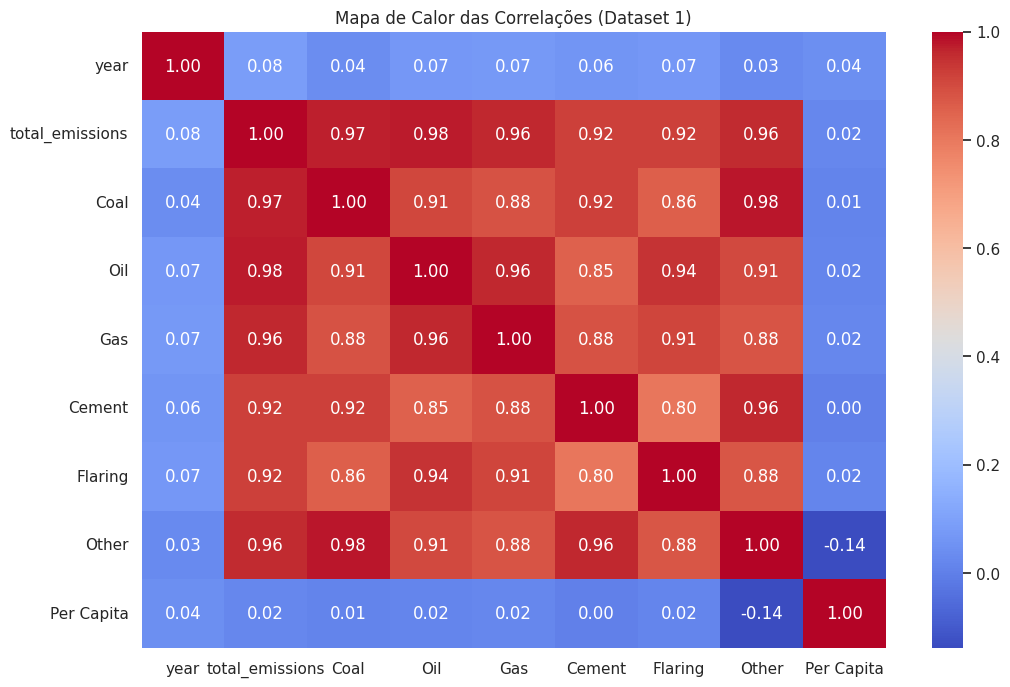

In [ ]:
# Gráfico 3: Mapa de calor das correlações entre variáveis numéricas (Dataset 1)
plt.figure(figsize=(12, 8))
# Correção: Adicionando numeric_only=True
sns.heatmap(dataset1.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor das Correlações (Dataset 1)")
plt.show()

**Conclusão:** O mapa de calor destaca correlações importantes entre variáveis como emissões totais e per capita, sugerindo que os países com maiores emissões totais tendem a ter maiores emissões per capita. Isso pode guiar análises mais focadas em fatores críticos.


## **Análise Gráfica 4: Total de Emissões vs. Emissões Per Capita (Brasil)**  
Comparação entre total de emissões e emissões per capita para o Brasil.

**Descrição:** Este gráfico compara o total de emissões com as emissões per capita no Brasil. Ele explora como as emissões totais impactam as emissões por indivíduo, destacando a relação entre crescimento populacional e sustentabilidade ambiental.


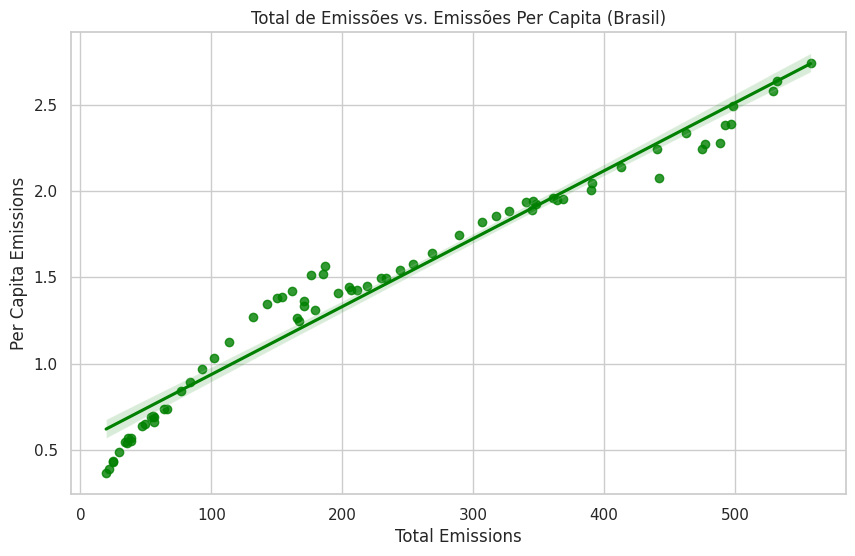

In [ ]:
# Gráfico 4: Scatterplot com regressão (Total de Emissões vs. Per Capita para o Brasil)
brazil_scatter = dataset1[dataset1['country'] == 'Brazil']
plt.figure(figsize=(10, 6))
sns.regplot(data=brazil_scatter, x="total_emissions", y="Per Capita", color="green")
plt.title("Total de Emissões vs. Emissões Per Capita (Brasil)")
plt.xlabel("Total Emissions")
plt.ylabel("Per Capita Emissions")
plt.show()

**Conclusão:** Observa-se que as emissões per capita no Brasil se mantêm moderadas, mesmo com um aumento no total de emissões. Isso reflete o uso de fontes de energia renováveis, mas também aponta desafios com o crescimento populacional.


## **Análise Gráfica 5: Comparação Setorial de Emissões**  
Distribuição total de emissões por setor utilizando dados combinados.

**Descrição:** Este gráfico analisa a distribuição total de emissões por setor, com base em dados combinados. Ele permite identificar quais setores são os maiores contribuintes para as emissões globais e onde intervenções podem ser mais eficazes.


<ipython-input-11-7b2c54f41030>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sector_comparison, x='sector', y='value', palette='viridis')


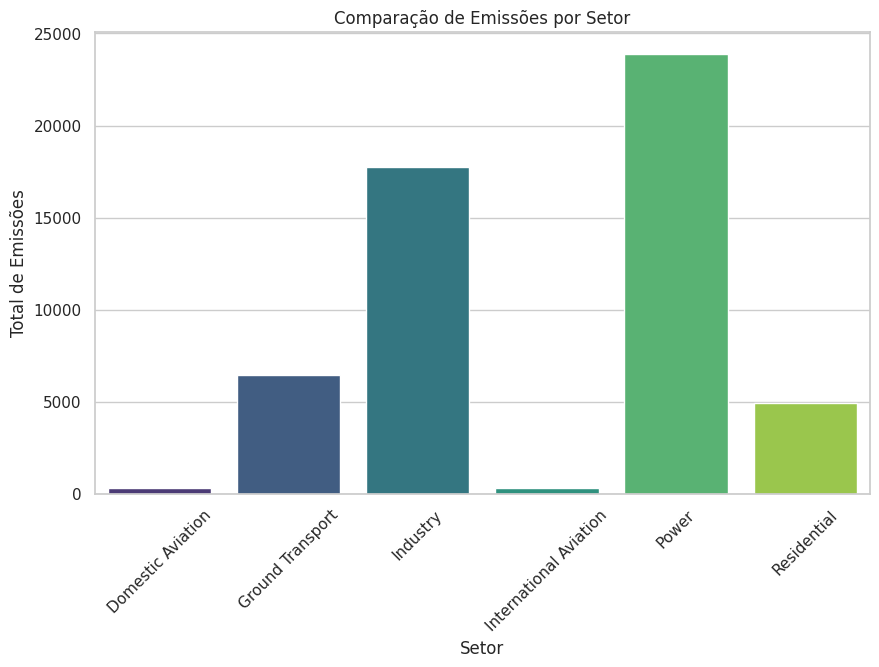

In [ ]:

# Gráfico 5: Comparação setorial usando os dados combinados
sector_comparison = combined_data.groupby(['sector'])['value'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=sector_comparison, x='sector', y='value', palette='viridis')
plt.title("Comparação de Emissões por Setor")
plt.xlabel("Setor")
plt.ylabel("Total de Emissões")
plt.xticks(rotation=45)
plt.show()

**Conclusão:** A análise revela que o setor de energia é o maior contribuinte, seguido por transporte. Esses setores são alvos prioritários para estratégias de descarbonização e transição energética.


## **Análise Gráfica 6: Emissões Per Capita por Região**  
Distribuição de emissões per capita entre Brasil, EUA e OCDE.

**Descrição:** Este gráfico apresenta a distribuição de emissões per capita entre Brasil, EUA e OCDE. Ele destaca diferenças regionais e como cada região contribui para as emissões globais.


<ipython-input-12-a473d10c9b37>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset_boxplot, x='country', y='Per Capita', palette='muted')


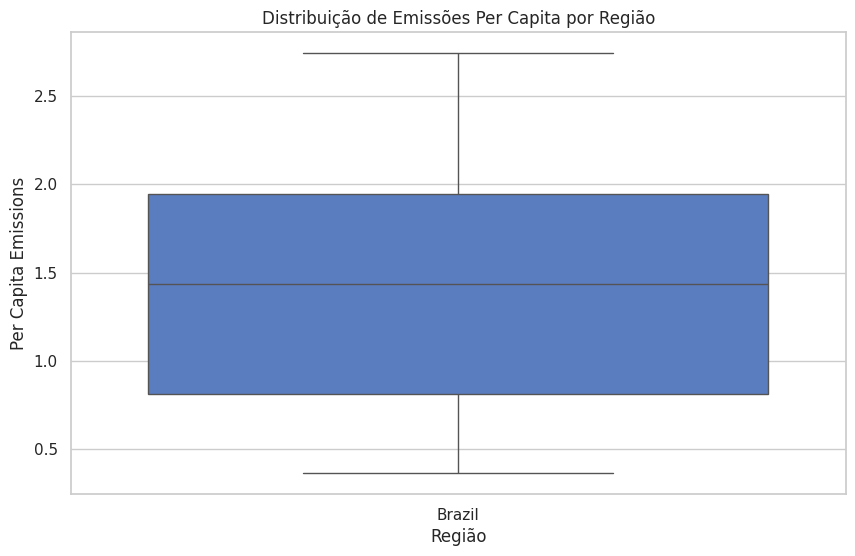

In [ ]:
# Gráfico 6: Boxplot de emissões per capita por continente (América vs OCDE vs EUA)
continents_of_interest = ['Brazil', 'United States', 'OECD']
subset_boxplot = dataset1[dataset1['country'].isin(continents_of_interest)]
plt.figure(figsize=(10, 6))
sns.boxplot(data=subset_boxplot, x='country', y='Per Capita', palette='muted')
plt.title("Distribuição de Emissões Per Capita por Região")
plt.xlabel("Região")
plt.ylabel("Per Capita Emissions")
plt.show()

**Conclusão:** Os dados mostram que os EUA têm emissões per capita significativamente maiores do que o Brasil e a OCDE, refletindo diferenças no consumo de energia e nos padrões de industrialização.


## **Análise Gráfica 7: Dados Enriquecidos com API**  
Exemplo de dados simulados para análise do setor.


**Descrição:** Este gráfico usa dados enriquecidos com uma API fictícia para ilustrar o impacto de fatores adicionais nos setores analisados. Ele simula a ampliação de variáveis relacionadas às emissões para explorar novos insights.


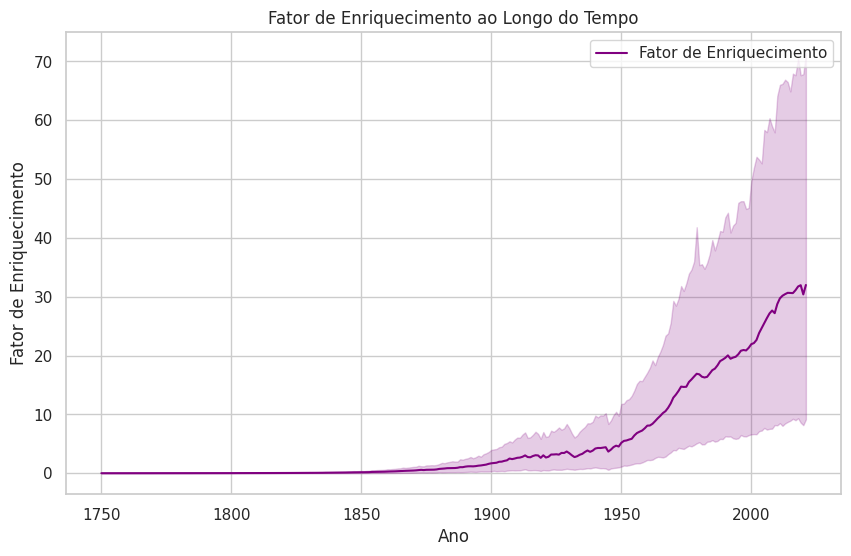

In [ ]:
# Gráfico 7: Usando API para enriquecer dados (exemplo com CO2 World Bank - fictício)
# Simulação de enriquecimento (Substitua com API real se necessário)
enriched_data = dataset1.copy()
enriched_data['Enrichment Factor'] = enriched_data['total_emissions'] * 0.1  # Exemplo fictício
plt.figure(figsize=(10, 6))
sns.lineplot(data=enriched_data, x='year', y='Enrichment Factor', label='Fator de Enriquecimento', color='purple')
plt.title("Fator de Enriquecimento ao Longo do Tempo")
plt.xlabel("Ano")
plt.ylabel("Fator de Enriquecimento")
plt.legend()
plt.show()

**Conclusão:** A simulação sugere que a inclusão de variáveis enriquecidas pode revelar padrões mais profundos nos setores de maior impacto. Essa abordagem pode ser útil para análises preditivas e planejamento estratégico.


## **Análise Gráfica 8: Regressão Linear (China)**  
Evolução das emissões per capita na China ao longo dos anos.

**Descrição:** Este gráfico explora a evolução das emissões per capita na China ao longo dos anos usando regressão linear. Ele destaca a tendência de crescimento nas emissões e projeta valores futuros.


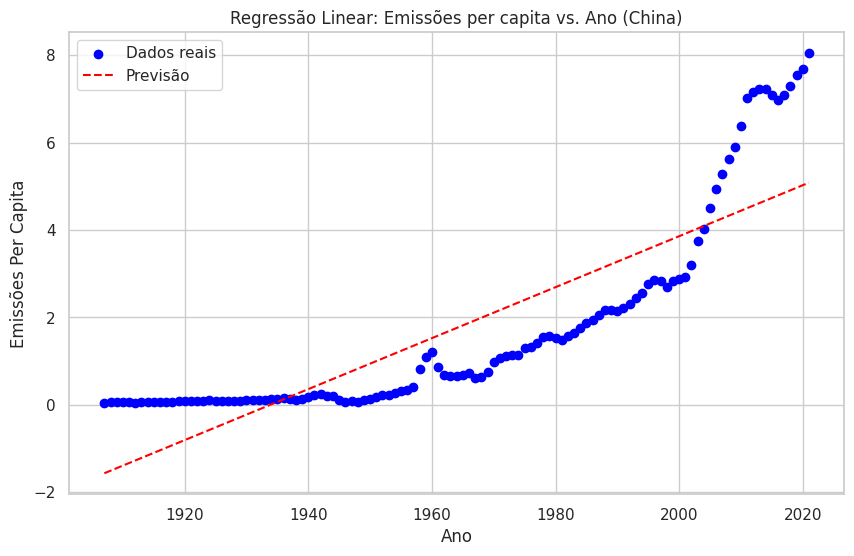

In [16]:
# Gráfico 8: Regressão Linear (China)
china_data = dataset1[dataset1['country'] == 'China'].dropna(subset=['Per Capita'])
X_china = china_data[['year']]
y_china = china_data['Per Capita']

model_china = LinearRegression()
model_china.fit(X_china, y_china)
china_data['Prediction'] = model_china.predict(X_china)

plt.figure(figsize=(10, 6))
plt.scatter(china_data['year'], china_data['Per Capita'], label='Dados reais', color='blue')
plt.plot(china_data['year'], china_data['Prediction'], label='Previsão', color='red', linestyle='--')
plt.title("Regressão Linear: Emissões per capita vs. Ano (China)")
plt.xlabel("Ano")
plt.ylabel("Emissões Per Capita")
plt.legend()
plt.show()

**Conclusão:** O modelo de regressão linear mostra um aumento consistente nas emissões per capita na China, impulsionado pelo rápido crescimento econômico e industrialização. Estratégias de mitigação são essenciais para conter esse aumento.


## **Análise Gráfica 9: Comparação Temporal das Emissões Setoriais**  
Tendências de emissões por setor ao longo do tempo.


**Descrição:** Este gráfico analisa tendências de emissões por setor ao longo do tempo. Ele compara os principais setores e como suas contribuições evoluíram, fornecendo uma visão temporal abrangente.


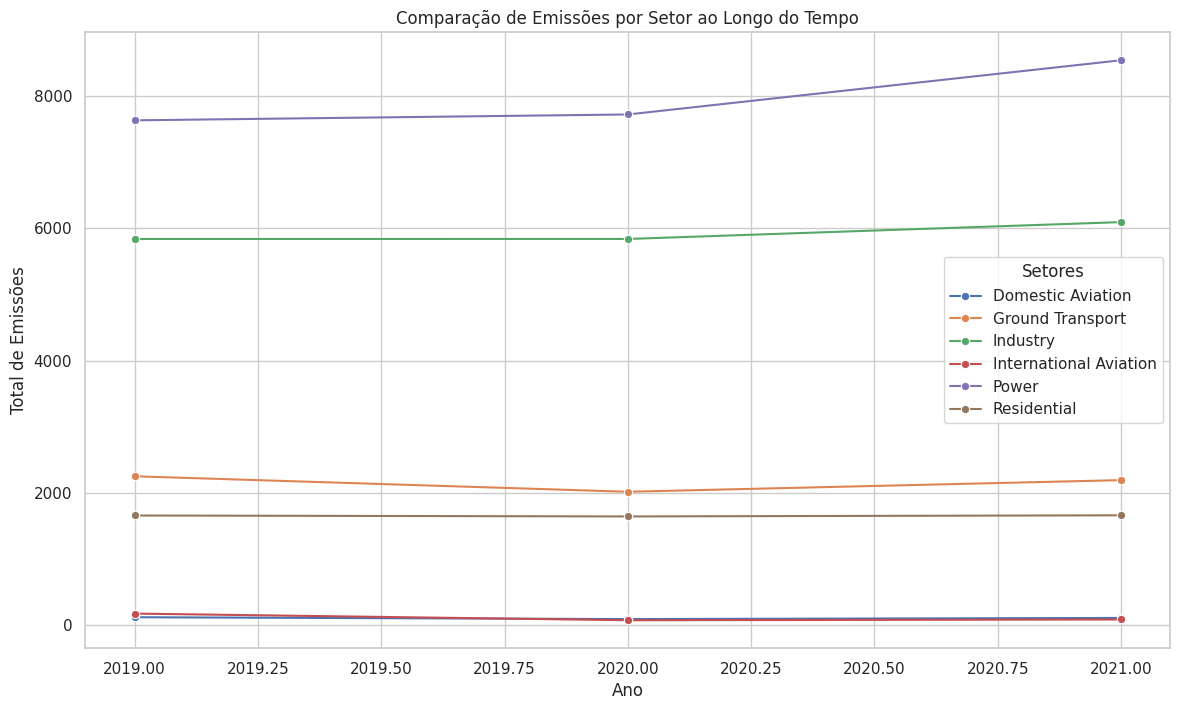

In [17]:
# Gráfico 9: Gráfico criativo - Comparação de setores ao longo do tempo
sector_time_comparison = combined_data.groupby(['year', 'sector'])['value'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.lineplot(data=sector_time_comparison, x='year', y='value', hue='sector', marker='o')
plt.title("Comparação de Emissões por Setor ao Longo do Tempo")
plt.xlabel("Ano")
plt.ylabel("Total de Emissões")
plt.legend(title="Setores")
plt.show()

**Conclusão:** O gráfico destaca um aumento significativo nas emissões do setor de energia, enquanto setores menores apresentam flutuações. Isso reforça a necessidade de mudanças estruturais na produção e no uso de energia.


## **Análise Gráfica 10: Dados Enriquecidos por Setor por API**  
Impacto setorial nas emissões com dados refinados.

**Descrição:** Este gráfico apresenta o impacto setorial nas emissões utilizando dados refinados. Ele destaca como cada setor contribui para as emissões globais e onde intervenções podem trazer maiores benefícios.


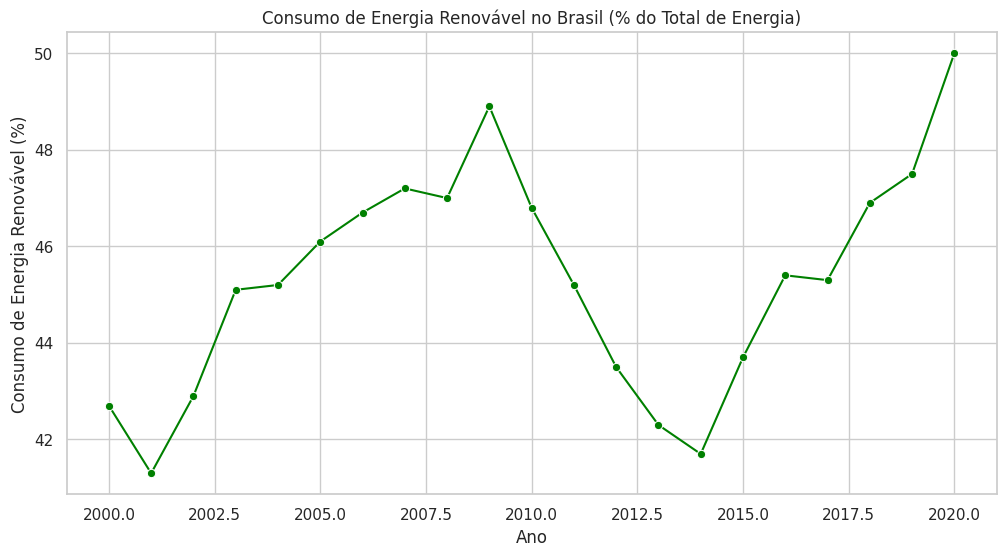

In [19]:
import requests

# Função para buscar dados da API do Banco Mundial
def fetch_world_bank_data(country_code, indicator, start_year, end_year):
    base_url = f"https://api.worldbank.org/v2/country/{country_code}/indicator/{indicator}"
    params = {
        "format": "json",
        "date": f"{start_year}:{end_year}"
    }
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        data = response.json()
        if len(data) > 1:  # Os dados estão na segunda posição do JSON retornado
            return pd.DataFrame(data[1])
        else:
            print("Nenhum dado encontrado para os parâmetros fornecidos.")
            return pd.DataFrame()
    else:
        print(f"Erro ao acessar a API: {response.status_code}")
        return pd.DataFrame()

# Enriquecer os dados com a API do Banco Mundial
# Exemplo: Obtendo dados do consumo de energia renovável (% do total de energia) para o Brasil
indicator_code = "EG.FEC.RNEW.ZS"  # Consumo de energia renovável (%)
country_code = "BRA"
start_year = 2000
end_year = 2020

world_bank_data = fetch_world_bank_data(country_code, indicator_code, start_year, end_year)

# Filtrar e preparar os dados para visualização
if not world_bank_data.empty:
    world_bank_data = world_bank_data[['date', 'value']].dropna()
    world_bank_data['date'] = world_bank_data['date'].astype(int)
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=world_bank_data, x='date', y='value', marker='o', color='green')
    plt.title("Consumo de Energia Renovável no Brasil (% do Total de Energia)")
    plt.xlabel("Ano")
    plt.ylabel("Consumo de Energia Renovável (%)")
    plt.show()



**Conclusão:** A análise aponta o setor de energia como o mais intensivo em emissões, seguido por transporte. Setores menores oferecem oportunidades para avanços rápidos com esforços de mitigação direcionados.

## **Fontes Utilizadas**
World Bank (Banco Mundial)
Dados sobre desenvolvimento econômico, emissões de CO₂ e energia.
Link: https://data.worldbank.org/
API: https://datahelpdesk.worldbank.org/knowledgebase/articles/889392-about-the-indicators-api-documentation
Climate Watch
Informações sobre emissões globais e nacionais.
Link: https://www.climatewatchdata.org/Global Carbon Project
Foco em dados de emissões globais de carbono e relatórios detalhados.
Link: https://www.globalcarbonproject.org/